# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.utils import np_utils
import numpy as np
np.random.seed(100)
% matplotlib inline

C:\Users\汪宇倫\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print("x_train.shape: ",x_train.shape)
print("y_train.shape: ",y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)


In [3]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [4]:
def print_image_label_predict (images, labels, predictions, startidx, num):
    if num>25:
        num = 25
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    idx = startidx
    for i in range(num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        text = str(i)+CIFAR100_LABELS_LIST[labels[idx][0]]
        if (len(predictions)>0):
            text += '=>'+CIFAR100_LABELS_LIST[predictions[idx][0]]
        ax.set_title(text,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()
        

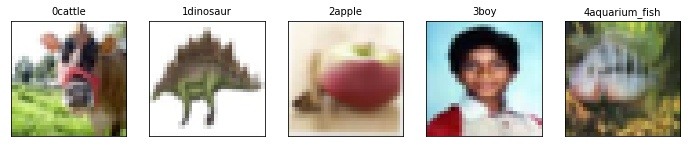

In [5]:
print_image_label_predict(x_train,y_train,[],0,5)

# Image normalize 

In [6]:
x_train_norm = x_train.astype('float64')/255.0
x_test_norm = x_test.astype('float64')/255.0

# 轉換label 為OneHot Encoding

In [7]:
print(y_train[:5])
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_train)
y_train_oh[:5]

[[19]
 [29]
 [ 0]
 [11]
 [ 1]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.